<a href="https://colab.research.google.com/github/rubeus08/Analytics-/blob/main/Financial_Market_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Financial Market News Sentiment Analysis**


**OBJECTIVE**
The objective of a Financial Market News Sentiment Analysis project is to systematically analyze and quantify the sentiment expressed in news articles, reports, and other textual data related to financial markets. This analysis can provide valuable insights and predictive power for various stakeholders, including investors, financial analysts, and market researchers.




**Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Financial%20Market%20News.csv

**Import Library**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

In [46]:
df= pd.read_csv('/content/Financial Market News.csv', encoding='latin-1')

In [47]:
df.head()


,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,News 9,News 10,News 11,News 12,News 13,News 14,News 15,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,Theatre review: The Circle,Wales face a fraught night,Under-21 round-up,Smith off to blot his copybook,Finns taking the mickey,Praise wasted as Brown studies injury options,Ireland wary of minnows,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,Review: The Guardsman,Opera: The Marriage of Figaro,Review: The Turk in Italy,Deutsche spells out its plans for diversification,Traders' panic sends oil prices skyward,TV sport chief leaves home over romance,Leader: Hi-tech twitch,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,The flood: Low-lying homes may become uninsurable,Synagogues and schools firebombed,Flood: Alerts remain as clean-up bill nears £2bn,Bitter divisions that halted talks within sigh...,No headline,'I have just killed your husband' wife was told,Torrid time assured,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,Empty gestures from Halifax,Review: Guilty Pleasures,Review: Waterboys,Business: Egg expands,Review: Uri Caine,The game that changed the face of cricket,'I hadn't a clue what was going on out there',More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,Classical review: Prokina/ Skigin,Theatre review: Hades,Theatre review: The Dispute/ The Critic,Theatre review: Twelfth Night,Consumers start to get a conscience,Richard Vinen's top 10 

**Data Desribe**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [49]:
df.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [50]:
df.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

In [51]:
df.index

RangeIndex(start=0, stop=4101, step=1)

In [52]:
len(df.index)

4101

**Data Preprocessing **

In [53]:
' '.join(str(x)for x in df.iloc[1,2:27])

"Warning from history points to crash Investors flee to dollar haven Banks and tobacco in favour Review: Llama Farmers War jitters lead to sell-off Your not-so-secret history Review: The Northern Sinfonia Review: Hysteria Review: The Guardsman Opera: The Marriage of Figaro Review: The Turk in Italy Deutsche spells out its plans for diversification Traders' panic sends oil prices skyward TV sport chief leaves home over romance Leader: Hi-tech twitch Why Wenger will stick to his Gunners Out of luck England hit rock bottom Wilkinson out of his depth Kinsella sparks Irish power play Brown banished as Scots rebound Battling Wales cling to lifeline Ehiogu close to sealing Boro move Man-to-man marking Match stats French referee at centre of storm is no stranger to controversy"

In [54]:
news =[]
for row in range(0,len(df.index)):
  news.append(' '.join(str(x)for x in df.iloc[row,2:27]))

In [55]:
type(news)

list

In [56]:
X = news
type(X)

list

In [57]:
X[0]

"McIlroy's men catch cold from Gudjonsson Obituary: Brian Walsh Workplace blues leave employers in the red Classical review: Rattle Dance review: Merce Cunningham Genetic tests to be used in setting premiums Opera review: La Bohème Pop review: Britney Spears Theatre review: The Circle Wales face a fraught night Under-21  round-up Smith off to blot his copybook Finns taking the mickey Praise wasted as Brown studies injury options Ireland wary of minnows Finland 0 - 0 England Healy a marked man Happy birthday Harpers & Queen Win unlimited access to the Raindance film festival Labour pledges £800m to bridge north-south divide Wales: Lib-Lab pact firm despite resignation Donald Dewar Regenerating homes  regenerates well-being in people Win £100 worth of underwear TV guide: Random views"

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer(lowercase=True,ngram_range=(1,1))

**Feature Variable(X)**

In [60]:
X = cv.fit_transform(X)

In [61]:
X.shape

(4101, 48527)

**Target Variable(y)**

In [62]:
y=df['Label']

**Train Test Split**

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier

**Modeling **

In [66]:
rf=RandomForestClassifier(n_estimators=200)

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

**Model Evaluation**

In [68]:
y_pred=rf.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [70]:
confusion_matrix(y_test,y_pred)

array([[126, 454],
       [146, 505]])

**Prediction**

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.22      0.30       580
           1       0.53      0.78      0.63       651

    accuracy                           0.51      1231
   macro avg       0.49      0.50      0.46      1231
weighted avg       0.50      0.51      0.47      1231



**Data Vizualization**

Text(0.5, 1.0, 'Report ')

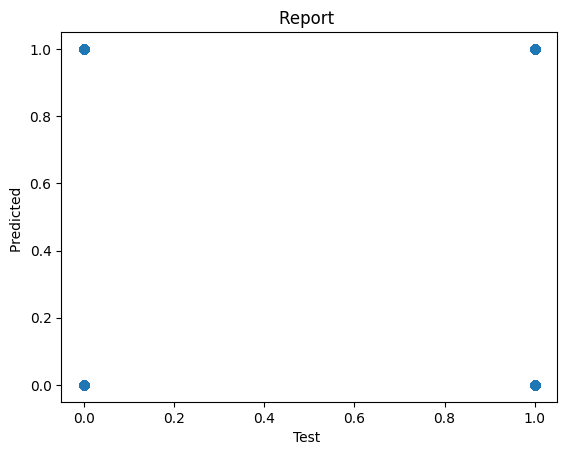

In [72]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test ")
plt.ylabel("Predicted ")
plt.title("Report ")